In [1]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
cars_df = pd.read_csv("Car_sales.csv")
cars_df = cars_df.dropna()

columns_to_remove = ["Manufacturer", "Model", "Vehicle_type", "Latest_Launch", "Sales_in_thousands", "Price_in_thousands", "Wheelbase", "Curb_weight", "__year_resale_value", "Engine_size", "Fuel_efficiency"]
cleaned_cars_df = cars_df.drop(columns=columns_to_remove)

print(cleaned_cars_df.head(10))

    Horsepower  Width  Length  Fuel_capacity  Power_perf_factor
0        140.0   67.3   172.4           13.2          58.280150
1        225.0   70.3   192.9           17.2          91.370778
3        210.0   71.4   196.6           18.0          91.389779
4        150.0   68.2   178.0           16.4          62.777639
5        200.0   76.1   192.0           18.5          84.565105
6        310.0   74.0   198.2           23.7         134.656858
8        193.0   68.5   176.0           16.6          81.877069
9        193.0   70.9   188.0           18.5          83.998724
10       175.0   72.7   194.6           17.5          71.181451
11       240.0   72.7   196.2           17.5          95.636703


In [6]:
k = 3

cluster_model = KMeans(n_clusters=k)
cluster_model.fit(cleaned_cars_df)

KMeans(n_clusters=3)

In [7]:
cluster_model.cluster_centers_.shape


(3, 5)

In [8]:
cluster_assigned_df = pd.DataFrame(cluster_model.predict(cleaned_cars_df), columns = ["cluster_id"])
cluster_assigned_df.index = cleaned_cars_df.index
cluster_assigned_df

,cluster_id
0,0
1,2
3,2
4,0
5,2
...,...
145,0
146,0
147,0
148,0


In [10]:
cluster_assigned_df["cluster_id"].value_counts()

cluster_id
2    56
0    50
1    11
Name: count, dtype: int64

In [24]:
for i in range(3):
    this_cluster = cluster_assigned_df[cluster_assigned_df["cluster_id"] == i]
    print("Cluster", i, "Size", this_cluster.shape[0])
    car_average = pd.DataFrame(cleaned_cars_df.loc[this_cluster.index].mean(axis = 0), columns = ["average"])
    display(car_average.head(5))

Cluster 0 Size 50


,average
Horsepower,131.560000
Width,69.138000
Length,179.916000
Fuel_capacity,15.528000
Power_perf_factor,53.458412


Cluster 1 Size 11


,average
Horsepower,308.818182
Width,72.936364
Length,190.618182
Fuel_capacity,20.009091
Power_perf_factor,133.191962


Cluster 2 Size 56


,average
Horsepower,200.625000
Width,72.678571
Length,194.114286
Fuel_capacity,19.421429
Power_perf_factor,82.658671


In [25]:
for cluster, cars in cluster_assigned_df.groupby("cluster_id"):
    print("Cluster:", cluster, "Size:", cars.shape[0])
    n = 5
    if (len(cars) < 5):
        n = len(cars)

    for a_id in cars.sample(n).index:
        print("\t", a_id, cars_df["Manufacturer"][a_id] + " " + cars_df["Model"][a_id])

Cluster: 0 Size: 50
	 0 Acura Integra
	 140 Toyota Tacoma
	 116 Plymouth Voyager
	 55 Ford Ranger
	 145 Volkswagen Golf
Cluster: 1 Size: 11
	 73 Lexus LS400
	 6 Audi A8
	 24 Chevrolet Corvette
	 14 Cadillac DeVille
	 16 Cadillac Eldorado
Cluster: 2 Size: 56
	 12 Buick Park Avenue
	 65 Infiniti I30
	 29 Chrysler Sebring Conv.
	 119 Pontiac Grand Am
	 124 Porsche Boxter


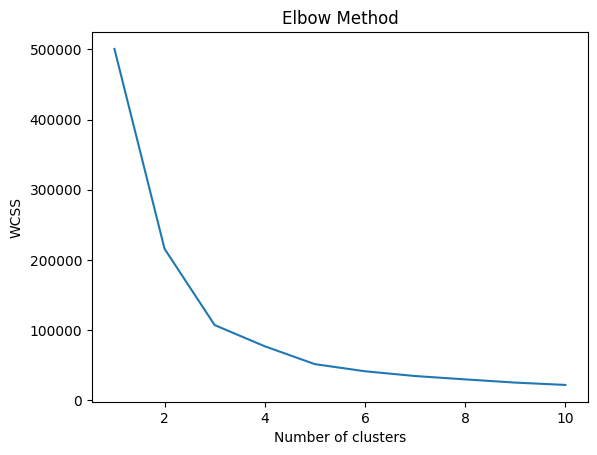

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cleaned_cars_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()